In [11]:
import matplotlib.pyplot as plt
from ai2thor.controller import Controller
import ai2thor.robot_controller

controller = ai2thor.robot_controller.Controller(host="stretch1.corp.ai2", port=9000, width=1280, height=720) #TODO frame width and height?
controller.step('Initialize')


'-- Start:'
'ACTION "Initialize"'
'POST'
200


KeyError: 'actionReturn'

In [8]:
def save_image(controller):
    image = controller.last_event.frame
    depth = controller.last_event.depth_frame
    path_to_save = '/Users/kianae/Desktop/real_stretch_images'
    import datetime
    import os
    os.makedirs(path_to_save, exist_ok=True)
    now = datetime.datetime.now().strftime("%m_%d_%Y_%H_%M_%S_%f")
    import matplotlib.pyplot as plt
    plt.imsave(os.path.join(path_to_save, now+'_depth.png'), depth)
    plt.imsave(os.path.join(path_to_save, now+'_image.png'), image)
def manual_run():
    while(True):
        action_options = ['m', 'r', 'l', 'b', 'hu', 'hd', 'ao', 'ai', 'go', 'gc', 'wp', 'wn']
        action = input()
        if action == 'q':
            break
        if action == 'm':
            controller.step('MoveAhead')
        if action == 'b':
            controller.step('MoveBack')
        if action == 'r':
            controller.step('RotateRight')
        if action == 'l':
            controller.step('RotateLeft')
        if action == 'hu':
            controller.step('MoveArmBaseP')
        if action == 'hd':
            controller.step('MoveArmBaseN')
        if action == 'ao':
            controller.step('MoveArmTargetP')
        if action == 'ai':
            controller.step('MoveArmTargetN')
        if action == 'wp':
            controller.step('MoveWristP')
        if action == 'wn':
            controller.step('MoveWristN')
        if action == 'go':
            controller.step('GraspOpen')
        if action == 'gc':
            controller.step('GraspClose')
        image = controller.last_event.frame
        plt.imshow(image)
        plt.show()
    

hu
'ACTION "MoveArmBaseP"'
'POST'
200


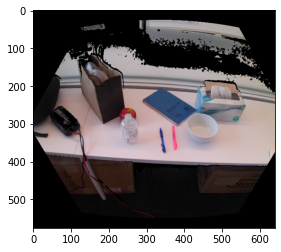

q


In [14]:
manual_run()

In [15]:
save_image(controller)

In [ ]:
controller.last_event.frame[0,0]
